# Microsoft Cognitive Services Examples

- [Overview](https://azure.microsoft.com/en-us/services/cognitive-services/?v=17.29)
- [Documentation & API Reference](https://docs.microsoft.com/en-us/azure/cognitive-services/)

**Note:** This notebook is for Python 3.  If using Python 2, check the examples linked in each section for the corresponding Python 2 code.



**delete this** https://github.com/gfhuertac/maka/tree/master/samples

In [1]:
import sys
import base64
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Displays images

# These libraries are specific to Python 3
import http.client, urllib.request, urllib.parse, urllib.error
import requests
    
# Displays matplotlib plots in the notebook
%matplotlib inline

# The region needs to match the region of the subscription
region = 'westcentralus.api.cognitive.microsoft.com'

---

## Vision APIs

- **Computer Vision:**  The broadest API of the three.  This returns a description of the image, categories, tags, colors, faces, and more.

- **Face:**  This specifically gives details about faces in an image.  Age, gender, emotion, hair color, facial hair, if glasses are present, etc.

- **Emotion:**  This is a lightweight version of the face API that only includes the emotions of the faces and the face locations.

For these examples, we'll use my Github profile picture:

<img src="https://avatars3.githubusercontent.com/u/13501239?v=4&s=460" style="width: 300px">

This is only a 420x420 picture, so the results won't be as impressive as higher resolution images will be.  However, we'll still find accurate results from our API calls.

### Computer Vision

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/home)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa)
- [Examples](https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts/python)

This will return a description of the image, the categories, tags, colors, faces, and more.

In [2]:
# Reading in Azure API key from a separate file
cvKey = open('cvKey.txt', 'r').read()

# Preparing the API request with request headers
headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': cvKey,
}

# Optional parameters to return
params = urllib.parse.urlencode({
    'visualFeatures': 'Categories,Faces,Description,Color',
    'language': 'en',
})

# Image to be analyzed
# Note the string/JSON format
body = "{'url':'https://avatars1.githubusercontent.com/u/\
13501239?v=4&s=400&u=c5148a74403cf152c3d8fbbac7567466f2105649.png'}"

# Executing the REST API call to get the response
try:
    conn = http.client.HTTPSConnection(region)
    conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()

    # 'data' contains the JSON data. The following formats the JSON data for display.
    parsed = json.loads(data)
    print("Response:")
    print(json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()

# Error handling
except Exception as e:
    print('Error:')
    print(e)

Response:
{
  "categories": [
    {
      "name": "people_",
      "score": 0.55859375
    }
  ],
  "color": {
    "accentColor": "865A45",
    "dominantColorBackground": "Grey",
    "dominantColorForeground": "White",
    "dominantColors": [
      "Grey"
    ],
    "isBWImg": false
  },
  "description": {
    "captions": [
      {
        "confidence": 0.9006892703704996,
        "text": "a man standing in front of a tree"
      }
    ],
    "tags": [
      "person",
      "outdoor",
      "man",
      "standing",
      "grass",
      "tree",
      "wood",
      "park",
      "front",
      "shirt",
      "walking",
      "young",
      "holding",
      "bench",
      "board",
      "riding",
      "white"
    ]
  },
  "faces": [
    {
      "age": 34,
      "faceRectangle": {
        "height": 50,
        "left": 177,
        "top": 170,
        "width": 50
      },
      "gender": "Male"
    }
  ],
  "metadata": {
    "format": "Png",
    "height": 400,
    "width": 400
  },
  "requ

### Faces

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/face/overview)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236)
- [Examples](https://docs.microsoft.com/en-us/azure/cognitive-services/face/quickstarts/python)

This will return the age, gender, emotion, hair color, facial hair, if glasses are present, and more from the faces in the picture.

In [3]:
# Reading in Azure API key from a separate file
faceKey = open('faceKey.txt', 'r').read()

# Request headers.
headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': faceKey,
}

# Request parameters.
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

# Image to be analyzed
# Note the string/JSON format
body = {'url': 'https://avatars1.githubusercontent.com/u/\
13501239?v=4&s=400&u=c5148a74403cf152c3d8fbbac7567466f2105649.png'}

uri_base = 'https://westcentralus.api.cognitive.microsoft.com'

# Executing the REST API call to get the response
try:
    response = requests.request('POST', uri_base + '/face/v1.0/detect',
                                json=body, data=None, headers=headers, params=params)

    # Displaying the JSON output from the API call
    print('Response:')
    parsed = json.loads(response.text)
    print(json.dumps(parsed, sort_keys=True, indent=2))

# Error handling
except Exception as e:
    print('Error:')
    print(e)

Response:
[
  {
    "faceAttributes": {
      "accessories": [],
      "age": 34.0,
      "blur": {
        "blurLevel": "low",
        "value": 0.0
      },
      "emotion": {
        "anger": 0.0,
        "contempt": 0.001,
        "disgust": 0.0,
        "fear": 0.0,
        "happiness": 0.993,
        "neutral": 0.006,
        "sadness": 0.0,
        "surprise": 0.0
      },
      "exposure": {
        "exposureLevel": "overExposure",
        "value": 0.77
      },
      "facialHair": {
        "beard": 0.2,
        "moustache": 0.1,
        "sideburns": 0.2
      },
      "gender": "male",
      "glasses": "NoGlasses",
      "hair": {
        "bald": 0.01,
        "hairColor": [
          {
            "color": "brown",
            "confidence": 1.0
          },
          {
            "color": "black",
            "confidence": 0.8
          },
          {
            "color": "gray",
            "confidence": 0.28
          },
          {
            "color": "other",
          

### Emotion

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/emotion/home)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/5639d931ca73072154c1ce89/operations/563b31ea778daf121cc3a5fa)
- [Examples](https://docs.microsoft.com/en-us/azure/cognitive-services/emotion/quickstarts/python)

This will return the emotions and location of the faces in a picture.

In [4]:
# Reading in Azure API key from a separate file
emotionKey = open('emotionKey.txt', 'r').read()

headers = {
    # Request headers. Replace the placeholder key below with your subscription key.
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': emotionKey,
}

params = urllib.parse.urlencode({
})

# Image to be analyzed
# Note the string/JSON format
body = "{'url':'https://avatars1.githubusercontent.com/u/\
13501239?v=4&s=400&u=c5148a74403cf152c3d8fbbac7567466f2105649.png'}"

try:
    # NOTE: You must use the same region in your REST call as you used to obtain your subscription keys.
    #   For example, if you obtained your subscription keys from westcentralus, replace "westus" in the 
    #   URL below with "westcentralus".
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("POST", "/emotion/v1.0/recognize?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    print(json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()
except Exception as e:
    print(e.args)

[
  {
    "faceRectangle": {
      "height": 50,
      "left": 177,
      "top": 170,
      "width": 50
    },
    "scores": {
      "anger": 4.03541071e-06,
      "contempt": 0.000613710959,
      "disgust": 8.788262e-06,
      "fear": 2.34950448e-07,
      "happiness": 0.99347353,
      "neutral": 0.005850302,
      "sadness": 4.64919867e-05,
      "surprise": 2.93453331e-06
    }
  }
]


Lastly, we'll test the face rectangle by cropping the image to just my face.

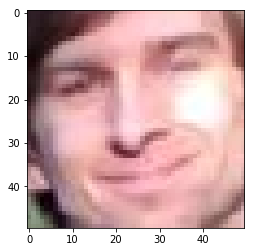

In [5]:
# Gathering the parameters for the borders of the face
face = parsed  # Giving a more intuitive name

faceTop = face[0]["faceRectangle"]["top"]
faceLeft = face[0]["faceRectangle"]["left"]
faceWidth = face[0]["faceRectangle"]["width"]
faceHeight = face[0]["faceRectangle"]["height"]

# The image URL to crop
picture = 'https://avatars1.githubusercontent.com/u/\
13501239?v=4&s=400&u=c5148a74403cf152c3d8fbbac7567466f2105649.png'

# Plotting the picture cropped to the face
img = mpimg.imread(picture)
plt.imshow(img[faceTop:faceTop + faceHeight, faceLeft:faceLeft + faceWidth]);

Well, that's flattering.  You can also ow see that one of my eyes is closed from the sunlight on my face.  Regardless, it's an accurate cropping.

---

## Text, Speech, and Language APIs

#### Detect Language

In [6]:
# Reading in Azure API key from a separate file
textKey = open('textKey.txt', 'r').read()

uri = 'westus.api.cognitive.microsoft.com'
path = '/text/analytics/v2.0/languages'

def get_language(documents):
    "Detects the languages for a set of documents and returns the information."

    headers = {'Ocp-Apim-Subscription-Key': textKey}
    conn = http.client.HTTPSConnection(uri)
    body = json.dumps(documents)
    conn.request("POST", path, body, headers)
    response = conn.getresponse()
    return response.read()

documents = {'documents': [
    {'id': '1', 'text': 'This is a document written in English.'},
    {'id': '2', 'text': 'Este es un document escrito en Español.'},
    {'id': '3', 'text': '这是一个用中文写的文件'},
    {'id': '4', 'text': "Ph'nglui mglw'nafh Cthulhu R'lyeh wgah'nagl fhtagn"}
]}

result = get_language(documents)
print(json.dumps(json.loads(result), indent=2))

{
  "documents": [
    {
      "id": "1",
      "detectedLanguages": [
        {
          "name": "English",
          "iso6391Name": "en",
          "score": 1.0
        }
      ]
    },
    {
      "id": "2",
      "detectedLanguages": [
        {
          "name": "Spanish",
          "iso6391Name": "es",
          "score": 1.0
        }
      ]
    },
    {
      "id": "3",
      "detectedLanguages": [
        {
          "name": "Chinese_Simplified",
          "iso6391Name": "zh_chs",
          "score": 1.0
        }
      ]
    },
    {
      "id": "4",
      "detectedLanguages": [
        {
          "name": "German",
          "iso6391Name": "de",
          "score": 1.0
        }
      ]
    }
  ],
  "errors": []
}


#### Sentiment Analysis

In [7]:
uri = 'westus.api.cognitive.microsoft.com'
path = '/text/analytics/v2.0/sentiment'

def get_sentiment(documents):
    "Gets the sentiments for a set of documents and returns the information."

    headers = {'Ocp-Apim-Subscription-Key': textKey}
    conn = http.client.HTTPSConnection(uri)
    body = json.dumps(documents)
    conn.request("POST", path, body, headers)
    response = conn.getresponse()
    return response.read()

documents = {'documents': [
    {'id': '1', 'language': 'en', 'text': 'I really enjoy the new XBox One S. It has a clean look, it has 4K/HDR resolution and it is affordable.'},
    {'id': '2', 'language': 'es', 'text': 'Este ha sido un dia terrible, llegué tarde al trabajo debido a un accidente automobilistico.'}
]}

result = get_sentiment(documents)
print(json.dumps(json.loads(result), indent=2))

{
  "documents": [
    {
      "score": 0.9998413324356079,
      "id": "1"
    },
    {
      "score": 0.024017512798309326,
      "id": "2"
    }
  ],
  "errors": []
}


#### Extract Key Phrases

In [8]:
uri = 'westus.api.cognitive.microsoft.com'
path = '/text/analytics/v2.0/keyPhrases'

def get_key_phrases(documents):
    "Gets the sentiments for a set of documents and returns the information."

    headers = {'Ocp-Apim-Subscription-Key': textKey}
    conn = http.client.HTTPSConnection(uri)
    body = json.dumps(documents)
    conn.request("POST", path, body, headers)
    response = conn.getresponse()
    return response.read()

documents = {'documents': [
    {'id': '1', 'language': 'en', 'text': 'I really enjoy the new XBox One S. It has a clean look, it has 4K/HDR resolution and it is affordable.'},
    {'id': '2', 'language': 'es', 'text': 'Si usted quiere comunicarse con Carlos, usted debe de llamarlo a su telefono movil. Carlos es muy responsable, pero necesita recibir una notificacion si hay algun problema.'},
    {'id': '3', 'language': 'en', 'text': 'The Grand Hotel is a new hotel in the center of Seattle. It earned 5 stars in my review, and has the classiest decor I\'ve ever seen.'}
]}

result = get_key_phrases(documents)
print(json.dumps(json.loads(result), indent=2))

{
  "documents": [
    {
      "keyPhrases": [
        "HDR resolution",
        "new XBox",
        "clean look"
      ],
      "id": "1"
    },
    {
      "keyPhrases": [
        "Carlos",
        "notificacion",
        "algun problema",
        "telefono movil"
      ],
      "id": "2"
    },
    {
      "keyPhrases": [
        "new hotel",
        "Grand Hotel",
        "review",
        "center of Seattle",
        "classiest decor",
        "stars"
      ],
      "id": "3"
    }
  ],
  "errors": []
}


---

## Knowledge & Search APIs

### Academic Knowledge

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/academic-knowledge/home)
- [API References](https://westus.dev.cognitive.microsoft.com/docs/services/56332331778daf02acc0a50b/operations/565d9001ca73072048922d97)
- [Examples]()


- **Interpret:** Interprets a natural language user query string. Returns annotated interpretations to enable rich search-box auto-completion experiences that anticipate what the user is typing.
- **Evaluate:** Evaluates a query expression and returns Academic Knowledge entity results.
- **Text Similarity:** Returns the cosine similarity between two strings.
- **CalcHistogram:** Calculates a histogram of the distribution of attribute values for the academic entities returned by a query expression, such as the distribution of citations by year for a given author.

#### Evaluate

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/academic-knowledge/evaluatemethod)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/56332331778daf02acc0a50b/operations/565d753be597ed16ac3ffc03)

For this example, we'll search for academic papers written by one of my professors.

In [9]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

# Reading in Azure API key from a separate file
academicKey = open('academicKey.txt', 'r').read()

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': academicKey,
}

params = urllib.parse.urlencode({
    # Request parameters
    'expr': "Composite(AA.AuN=='edward mcfowland')",  # Main query
    'model': 'latest',  # Name of the model querying
    'count': '3',  # Number of results to retrun
    'offset': '0',  # Index of the first result to return
    'attributes': 'Ti,Y,CC,AA.AuN,AA.AuId',  # Attributes to return
})

try:
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("GET", "/academic/v1.0/evaluate?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    print(json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

{
  "entities": [
    {
      "AA": [
        {
          "AuId": 123788635,
          "AuN": "edward mcfowland"
        },
        {
          "AuId": 2000003124,
          "AuN": "skyler speakman"
        },
        {
          "AuId": 2115216468,
          "AuN": "daniel b neill"
        }
      ],
      "CC": 22,
      "Id": 2146022760,
      "Ti": "fast generalized subset scan for anomalous pattern detection",
      "Y": 2013,
      "logprob": -19.705
    },
    {
      "AA": [
        {
          "AuId": 2000003124,
          "AuN": "skyler speakman"
        },
        {
          "AuId": 123788635,
          "AuN": "edward mcfowland"
        },
        {
          "AuId": 2115216468,
          "AuN": "daniel b neill"
        }
      ],
      "CC": 11,
      "Id": 1970768703,
      "Ti": "scalable detection of anomalous patterns with connectivity constraints",
      "Y": 2015,
      "logprob": -20.135
    },
    {
      "AA": [
        {
          "AuId": 2115216468,
          "A

#### Interpret

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/academic-knowledge/interpretmethod)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/56332331778daf02acc0a50b/operations/56332331778daf06340c9666)

We'll enter a search for academic papers written by an author and see how the query is interpreted.

In [10]:
headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': academicKey,
}

params = urllib.parse.urlencode({
    # Request parameters
    'query': 'papers by jaime teevan',  # Query generated by the user
    'complete': '0',  # 1 gives auto-completion suggestions
    'count': '10',  # Number of interpretations to return
    'offset': '0',  # Index of the first interpretation to return
    'timeout': '1000',  # Timeout in milliseconds.  Default is 1,000
    'model': 'latest',  # Name of the model to query.  Default is latest
})

try:
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("GET", "/academic/v1.0/interpret?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    print(json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

{
  "interpretations": [
    {
      "logprob": -22.982,
      "parse": "<rule name=\"#GetPapers\">papers by <attr name=\"academic#AA.AuN\">jaime teevan</attr></rule>",
      "rules": [
        {
          "name": "#GetPapers",
          "output": {
            "type": "query",
            "value": "Composite(AA.AuN=='jaime teevan')"
          }
        }
      ]
    },
    {
      "logprob": -25.505,
      "parse": "<rule name=\"#GetPapers\">papers by <attr name=\"academic#AA.AuN\" canonical=\"jaime brooks teevan\">jaime teevan</attr></rule>",
      "rules": [
        {
          "name": "#GetPapers",
          "output": {
            "type": "query",
            "value": "Composite(AA.AuN=='jaime brooks teevan')"
          }
        }
      ]
    }
  ],
  "query": "papers by jaime teevan"
}


#### Text Similarity

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/academic-knowledge/similaritymethod)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/56332331778daf02acc0a50b/operations/58076bdadcf4c40708f83791)

We'll generate the cosine similarity between two sentences.

In [11]:
headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': academicKey,
}

params = urllib.parse.urlencode({
    # Request parameters
    's1': 'This is a string',
    's2': 'This is also a string, and it is very similar',
})

try:
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("GET", "/academic/v1.0/similarity?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print('Text Similarity:', data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

Text Similarity: b'0.81168925283689186'


#### CalcHistogram

- [Documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/academic-knowledge/calchistogrammethod)
- [API Reference](https://westus.dev.cognitive.microsoft.com/docs/services/56332331778daf02acc0a50b/operations/565d9001ca73072048922d97)

In [12]:
headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': academicKey,
}

params = urllib.parse.urlencode({
    # Request parameters
    'expr': "And(Composite(AA.AuN=='jaime teevan'),Y>2012)",  # Query of which entities to calculate histograms for
    'model': 'latest',  # Name of the model querying
    'attributes': 'Y,F.FN',  # Attributes to be included in the response
    'count': '5',  # Number of results to return
    'offset': '0',  # Index of the first result
})

try:
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("GET", "/academic/v1.0/calchistogram?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    print(json.dumps(parsed, sort_keys=True, indent=2))
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

{
  "expr": "And(Composite(AA.AuN=='jaime teevan'),Y>2012)",
  "histograms": [
    {
      "attribute": "Y",
      "distinct_values": 5,
      "histogram": [
        {
          "count": 18,
          "logprob": -17.057,
          "value": 2013
        },
        {
          "count": 13,
          "logprob": -17.29,
          "value": 2014
        },
        {
          "count": 16,
          "logprob": -17.85,
          "value": 2016
        },
        {
          "count": 13,
          "logprob": -17.924,
          "value": 2015
        },
        {
          "count": 9,
          "logprob": -18.591,
          "value": 2017
        }
      ],
      "total_count": 69
    },
    {
      "attribute": "F.FN",
      "distinct_values": 89,
      "histogram": [
        {
          "count": 43,
          "logprob": -16.466,
          "value": "computer science"
        },
        {
          "count": 33,
          "logprob": -16.515,
          "value": "world wide web"
        },
        {
 